In [98]:
a = [1, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6]
b = [6, 6, 6, 1, 2, 1, 1, 2, 1, 1, 1, 6, 6]
c = [1, 2, 2, 2, 6, 6, 6, 2, 1, 1, 2, 2]
d = [1, 2, 2, 2, 6, 2, 1, 1, 2, 2]
e = [6, 6, 6, 6, 6, 2, 1, 5, 2, 2]
f = [6, 6, 6, 6, 2, 6, 6, 6, 6, 6]
g = [6, 2, 6, 2, 2, 6, 2, 2, 2, 6]

In [99]:
def removeIsolated(signal, gesture):
    for i in range(len(signal)):
        if signal[i] == gesture:
            if i == 0:
                if signal[i + 1] != gesture:
                    signal[i] = -1
            elif i == len(signal) - 1:
                if signal[i - 1] != gesture:
                    signal[i] = -1
            else:
                if signal[i - 1] != gesture and signal[i + 1] != gesture:
                    signal[i] = -1
    return signal

def emgPostProcessing(signal):
    i, j = -1, -1
    signal = removeIsolated(signal.copy(), 6)
    for k in range(len(signal)):
        if i != -1 and (j != -1 or k == len(signal) - 1):
            if j == -1 and k == len(signal) - 1:
                j = k + 1

            if i == j:
                signal[i] = 6
                continue
            
            most_common = max(set(signal[i:j]), key=signal[i:j].count)
            for l in range(i, j):
                signal[l] = most_common
            
            i, j = -1, -1

        if signal[k] == 6:
            if i != -1 and j == -1:
                j = k - 1
            continue

        if i == -1:
            i = k
            continue

    return signal


In [100]:
import matplotlib.pyplot as plt

def plot(signal, original=[]):
    if original:
        plt.plot(original, label="Original")
    plt.plot(signal, label="Predicted")
    plt.plot(emgPostProcessing(signal), label="Processed")
    plt.legend()
    plt.show()

In [101]:
print(a, emgPostProcessing(a))
print(b, emgPostProcessing(b))
print(c, emgPostProcessing(c))
print(d, emgPostProcessing(d))
print(e, emgPostProcessing(e))
print(f, emgPostProcessing(f))
print(g, emgPostProcessing(g))

[1, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6] [2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 1, 2, 1, 1, 2, 1, 1, 1, 6, 6] [6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6]
[1, 2, 2, 2, 6, 6, 6, 2, 1, 1, 2, 2] [2, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2, 2]
[1, 2, 2, 2, 6, 2, 1, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[6, 6, 6, 6, 6, 2, 1, 5, 2, 2] [6, 6, 6, 6, 6, 2, 2, 2, 2, 2]
[6, 6, 6, 6, 2, 6, 6, 6, 6, 6] [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 2, 6, 2, 2, 6, 2, 2, 2, 6] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


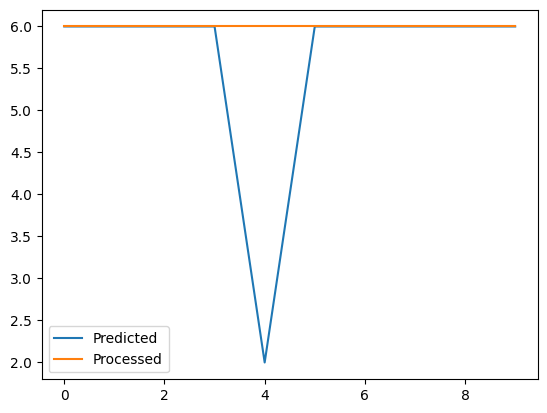

In [102]:
plot(f)

[6, 6, 6, 6, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6]


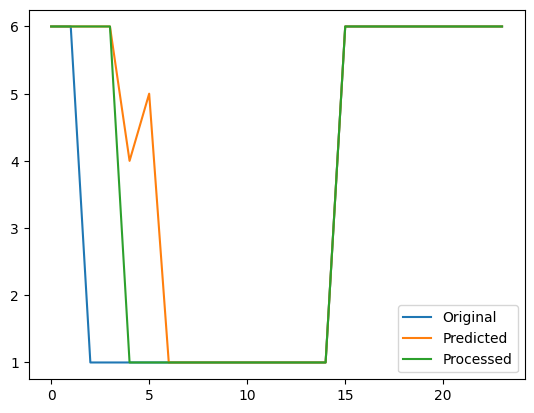

In [106]:
x = [6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6]
y = [6,6,6,6,4,5,1,1,1,1,1,1,1,1,1,6,6,6,6,6,6,6,6,6]
z = emgPostProcessing(y)
print(y)
print(z)
plot(y, x)